In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path       

In [4]:
combined_rep_dir = Path("/Volumes/tcs_jf_fair_node_sampling/pokec_allexp_graphs0_synthlabels/data/reports/combined_results")
baseline_path = combined_rep_dir / "pokec_distinct_0_results_baseline.csv" 
cw_path = combined_rep_dir / "pokec_distinct_0_results_cw.csv"

In [18]:
df_baseline = pd.read_csv(baseline_path)
df_baseline.info()
df_baseline.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 110 entries, p to support_4_cond_7
dtypes: float64(107), object(3)
memory usage: 27.6+ KB


,p,q,sens_attr,other_attr,attribute,f1_macro,accuracy,support,f1_macro_class_0,f1_macro_class_1,...,f1_macro_class_0_cond_7,support_0_cond_7,f1_macro_class_1_cond_7,support_1_cond_7,f1_macro_class_2_cond_7,support_2_cond_7,f1_macro_class_3_cond_7,support_3_cond_7,f1_macro_class_4_cond_7,support_4_cond_7
0,1.0,0.1,synthetic_label_AGE_negcorr,synthetic_label_region_negcorr,other,0.238915,0.369425,1252.0,0.006742,0.212737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.1,synthetic_label_AGE_negcorr,synthetic_label_region_negcorr,sensitive,0.230468,0.341470,1252.0,0.017591,0.264025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.1,0.1,synthetic_label_AGE_negcorr,synthetic_label_region_negcorr,other,0.236396,0.369808,1252.0,0.002273,0.221764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.1,0.1,synthetic_label_AGE_negcorr,synthetic_label_region_negcorr,sensitive,0.237663,0.349936,1252.0,0.018284,0.270183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,synthetic_label_AGE_negcorr,synthetic_label_region_negcorr,other,0.239411,0.372236,1252.0,0.013143,0.220958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,synthetic_label_AGE_negcorr,synthetic_label_region_negcorr,sensitive,0.232160,0.346198,1252.0,0.010674,0.278997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,0.1,label_AGE,label_region,other,0.982362,0.986134,1252.0,0.969808,0.990350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,0.1,label_AGE,label_region,sensitive,0.661181,0.724633,1252.0,0.683270,0.473564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.1,1.0,synthetic_label_AGE_noncorr,synthetic_label_region_noncorr,other,0.183002,0.301565,1252.0,0.020471,0.201381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.1,1.0,synthetic_label_AGE_noncorr,synthetic_label_region_noncorr,sensitive,0.187020,0.298690,1252.0,0.033961,0.194974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


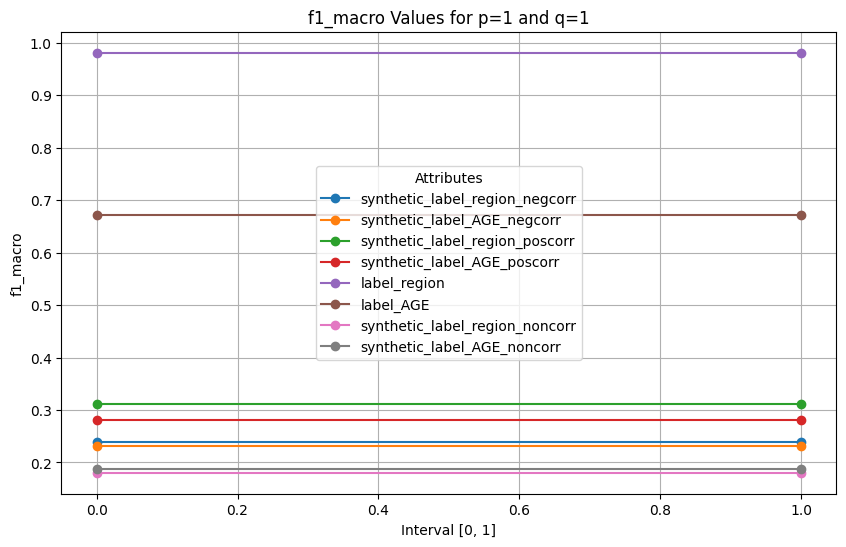

<Figure size 640x480 with 0 Axes>

In [14]:
# Filter the DataFrame for p=1 and q=1
filtered_df = df_baseline[(df_baseline['p'] == 1.0) & (df_baseline['q'] == 1.0)]

#Prepare the data for plotting
plot_data = {}

for index, row in filtered_df.iterrows():
    key = row['sens_attr'] if row['attribute'] == 'sensitive' else row['other_attr']
    if key not in plot_data:
        plot_data[key] = []
    plot_data[key].append(row['f1_macro'])

# Adjust the plot_data to have the correct length for each line (ensuring two points)
for key in plot_data:
    if len(plot_data[key]) == 1:
        plot_data[key].append(plot_data[key][0])  # Duplicate the single value to match the interval length


# Create the plot
x_values = [0, 1]

plt.figure(figsize=(10, 6))
for key, values in plot_data.items():
    plt.plot(x_values, values, marker='o', label=key)

plt.xlabel('Interval [0, 1]')
plt.ylabel('f1_macro')
plt.title('f1_macro Values for p=1 and q=1')
plt.legend(title='Attributes')
plt.grid(True)
plt.show()
plt.clf()


In [17]:
df_cw = pd.read_csv(cw_path)
# df_cw.info()
df_cw.head(10)

,alpha,exponent,p,q,sens_attr,other_attr,attribute,f1_macro,accuracy,support,...,f1_macro_class_4_cond_2,support_4_cond_2,f1_macro_cond_7,support_cond_7,f1_macro_class_0_cond_7,support_0_cond_7,f1_macro_class_1_cond_7,support_1_cond_7,f1_macro_class_2_cond_7,support_2_cond_7
0,0.8,2,0.1,0.1,synthetic_label_region_noncorr,label_AGE,other,0.652098,0.716006,1252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.8,2,0.1,0.1,synthetic_label_region_noncorr,label_AGE,sensitive,0.154003,0.222013,1252.0,...,0.029165,41.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.5,8,1.0,1.0,label_region,label_AGE,other,0.493431,0.586550,1252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.5,8,1.0,1.0,label_region,label_AGE,sensitive,0.941946,0.938051,1252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.8,2,1.0,0.1,synthetic_label_region_negcorr,label_AGE,other,0.652233,0.711981,1252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.8,2,1.0,0.1,synthetic_label_region_negcorr,label_AGE,sensitive,0.195621,0.296070,1252.0,...,0.127675,62.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.8,8,1.0,0.1,synthetic_label_region_negcorr,label_region,other,0.974996,0.979489,1252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.8,8,1.0,0.1,synthetic_label_region_negcorr,label_region,sensitive,0.205426,0.329649,1252.0,...,0.000000,9.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.8,2,1.0,0.1,synthetic_label_AGE_noncorr,label_region,other,0.978756,0.982332,1252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.8,2,1.0,0.1,synthetic_label_AGE_noncorr,label_region,sensitive,0.162233,0.241949,1252.0,...,0.050448,28.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


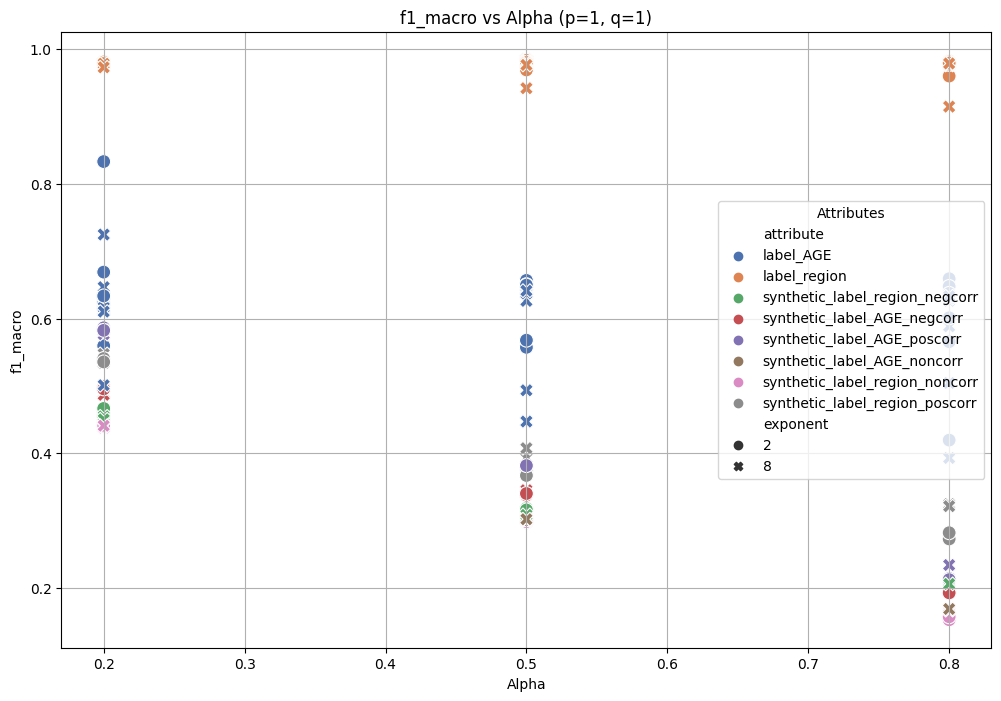

<Figure size 640x480 with 0 Axes>

In [19]:
# Filter the DataFrame for p=1 and q=1
filtered_df = df_cw[(df_cw['p'] == 1.0) & (df_cw['q'] == 1.0)]

# Step 2: Prepare data for plotting
plot_data = {
    'alpha': [],
    'f1_macro': [],
    'attribute': [],
    'exponent': []
}

# Step 3: Access and map the correct f1_macro values based on the attribute
for index, row in filtered_df.iterrows():
    # Based on the attribute, access the correct f1_macro value
    plot_data['alpha'].append(row['alpha'])
    plot_data['f1_macro'].append(row['f1_macro'])
    plot_data['attribute'].append(row['sens_attr'] if row['attribute'] == 'sensitive' else row['other_attr'])
    plot_data['exponent'].append(row['exponent'])

# Convert plot_data to DataFrame for easy plotting
plot_df = pd.DataFrame(plot_data)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=plot_df, 
    x='alpha', 
    y='f1_macro', 
    hue='attribute', 
    style='exponent', 
    palette='deep',
    s=100
)

plt.xlabel('Alpha')
plt.ylabel('f1_macro')
plt.title('f1_macro vs Alpha (p=1, q=1)')
plt.legend(title='Attributes')
plt.grid(True)
plt.show()
plt.clf()

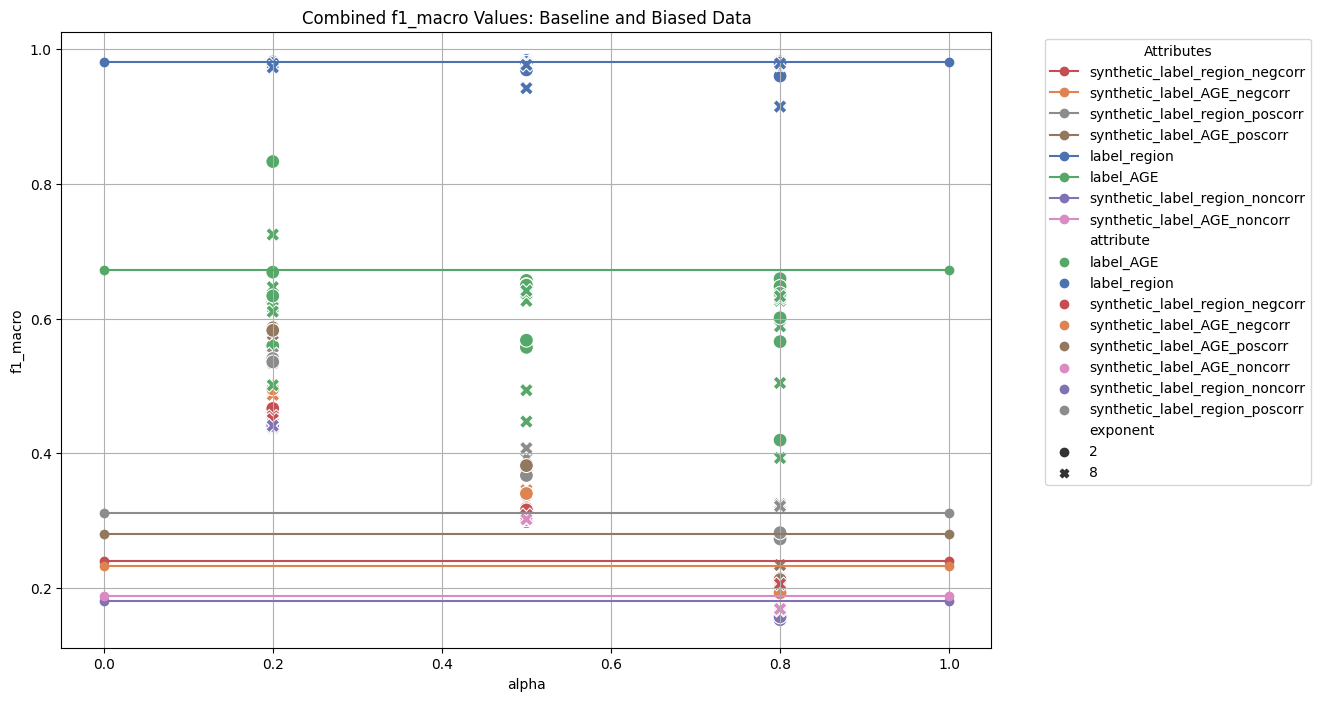

<Figure size 640x480 with 0 Axes>

In [22]:
filtered_baseline_df = df_baseline[(df_baseline['p'] == 1.0) & (df_baseline['q'] == 1.0)]
filtered_cw_df = df_cw[(df_cw['p'] == 1.0) & (df_cw['q'] == 1.0)]


baseline_plot_data = {}
cw_plot_data = {
    'alpha': [],
    'f1_macro': [],
    'attribute': [],
    'exponent': []
}


for index, row in filtered_baseline_df.iterrows():
    key = row['sens_attr'] if row['attribute'] == 'sensitive' else row['other_attr']
    if key not in baseline_plot_data:
        baseline_plot_data[key] = []
    baseline_plot_data[key].append(row['f1_macro'])

for key in baseline_plot_data:
    if len(baseline_plot_data[key]) == 1:
        baseline_plot_data[key].append(baseline_plot_data[key][0])  # Duplicate the single value to match the interval length


for index, row in filtered_cw_df.iterrows():
    cw_plot_data['alpha'].append(row['alpha'])
    cw_plot_data['f1_macro'].append(row['f1_macro'])
    cw_plot_data['attribute'].append(row['sens_attr'] if row['attribute'] == 'sensitive' else row['other_attr'])
    cw_plot_data['exponent'].append(row['exponent'])

cw_plot_df = pd.DataFrame(cw_plot_data)


# Determine the unique attributes for the color palette
unique_attributes = list(set(cw_plot_df['attribute'].unique()) | set(baseline_plot_data.keys()))

# Generate the color palette to match the number of unique attributes
palette = sns.color_palette('deep', n_colors=len(unique_attributes))

# Map attributes to colors
attribute_color_map = {attribute: palette[i] for i, attribute in enumerate(unique_attributes)}


plt.figure(figsize=(12, 8))

# Plotting baseline as lines with matching colors
for key, values in baseline_plot_data.items():
    plt.plot(x_values, values, marker='o', label=key, linestyle='-', color=attribute_color_map[key])


# Overlay biased data as points with matching colors
sns.scatterplot(
    data=cw_plot_df, 
    x='alpha', 
    y='f1_macro', 
    hue='attribute', 
    style='exponent', 
    palette=attribute_color_map,
    s=100
)



plt.xlabel('alpha')
plt.ylabel('f1_macro')
plt.title('Combined f1_macro Values: Baseline and Biased Data')
plt.legend(title='Attributes', )
plt.grid(True)
plt.show()
plt.clf()